(PUNTOSINTERIORES)=

# 4.5 Puntos interiores (PI)

```{admonition} Notas para contenedor de docker:

Comando de docker para ejecución de la nota de forma local:

nota: cambiar `<ruta a mi directorio>` por la ruta de directorio que se desea mapear a `/datos` dentro del contenedor de docker.

`docker run --rm -v <ruta a mi directorio>:/datos --name jupyterlab_optimizacion_2 -p 8888:8888 -p 8787:8787 -d palmoreck/jupyterlab_optimizacion_2:3.0.0`

password para jupyterlab: `qwerty`

Detener el contenedor de docker:

`docker stop jupyterlab_optimizacion_2`

Documentación de la imagen de docker `palmoreck/jupyterlab_optimizacion_2:3.0.0` en [liga](https://github.com/palmoreck/dockerfiles/tree/master/jupyterlab/optimizacion_2).

```

---

Nota generada a partir de [liga1](https://drive.google.com/file/d/16-_PvWNaO0Zc9x04-SRsxCRdn5fxebf2/view), [liga2](https://drive.google.com/file/d/1oulU1QAKyLyYrkpJBLSPlbWnKFCWpllX/view), [liga3](https://drive.google.com/file/d/1RMwUXEN_SOHKue-J9Cx3Ldvj9bejLjiM/view)

```{admonition} Al final de esta nota el y la lectora:
:class: tip

* 

```

```{sidebar} Un poco de historia ...

El [método símplex](https://en.wikipedia.org/wiki/Simplex_algorithm) desarrollado por Dantzig en los $40$'s hizo posible que se formularan y analizaran modelos grandes en una forma sistemática y eficiente. Hoy en día continúa siendo uno de los métodos más utilizados para resolver programas lineales. No obstante puede ser ineficiente en problemas lineales "patológicos" (ver [Klee-Minty cube](https://en.wikipedia.org/wiki/Klee%E2%80%93Minty_cube)) pues el tiempo para resolver tales problemas es exponencial respecto al tamaño del problema (medido como el número de variables y la cantidad de almacenamiento para los datos del problema). Para la mayoría de problemas prácticos el método símplex es mucho más eficiente que estos casos "patológicos" pero esto motivó la investigación y desarrollo de nuevos algoritmos con mejor desempeño. En 1984 Karmarkar publicó el [algoritmo](https://en.wikipedia.org/wiki/Karmarkar%27s_algorithm) que lleva su mismo nombre que tiene una complejidad polinomial y en la práctica resultó ser eficiente. Pertenece a la clase de métodos con el nombre de [puntos interiores](https://en.wikipedia.org/wiki/Interior-point_method). Hay diferentes tipos de métodos por puntos interiores siendo los de la clase primal-dual ampliamente usados en la práctica. 

```

Los métodos por puntos interiores (PI) son esquemas iterativos que en un inicio se utilizaron para resolver PL's, sin embargo, se ha extendido su uso al caso no lineal. Por ejemplo, distintos tipos de métodos por PI han sido usados para resolver problemas de optimización convexos, ver {ref}`problemas de optimización convexa en su forma estándar o canónica <PROBOPTCONVEST>`.

En cada iteración de los métodos PI las restricciones de desigualdad del problema de optimización se satisfacen de forma estricta. Cada iteración es costosa de calcular y realiza avance significativo a la solución en contraste con el método símplex que requiere un gran número de iteraciones no costosas. No obstante, una propiedad que tienen los métodos PI es que los problemas grandes no requieren muchas más iteraciones que los problemas pequeños a diferencia del método símplex.

En cada iteración el método símplex se mueve de la solución FEV actual a una solución FEV adyacente por una arista de la frontera de la región factible. Los problemas grandes tienen una cantidad enorme de soluciones FEV. Para ver esto piénsese en un PL al que se le van añadiendo restricciones funcionales. Entonces se añadirán aristas y por tanto soluciones FEV.  Los métodos PI evitan tal comportamiento pues avanzan por el interior de la región factible hacia los puntos óptimos y tiene muy poco efecto el ir añadiedo restricciones funcionales al PL para el desempeño de los métodos PI.

```{margin}

Recuérdese que nombramos problemas de optimización *large scale* a aquellos problemas de optimización **con restricciones** que tienen un número de variables y restricciones mayor o igual a $10^5$ (ambas).

```

```{admonition} Comentario

Los métodos PI pueden manejar un número grande de variables y restricciones, por ejemplo mayor a $10^5$, lo que los coloca como métodos para resolver problemas de optimización *large scale*. Además son métodos que pueden implementarse para procesamiento con cómputo en paralelo.

```

Conforme se avanza en las interaciones en los métodos PI se aproxima a los puntos óptimos sin llegar a tener un valor numérico igual a éstos. Por ejemplo, para el {ref}`ejemplo prototipo <EJPROTOTIPO>` de un programa lineal se presenta una trayectoria obtenida por un método PI que se acerca a la solución óptima $(2, 6)$:

$$\displaystyle \max_{x \in \mathbb{R}^2} 3x_1 + 5x_2$$

$$\text{sujeto a: }$$

$$x_1 \leq 4$$

$$2x_2 \leq 12$$

$$3x_1 + 2x_2 \leq 18$$

$$x_1 \geq 0, x_2 \geq 0$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

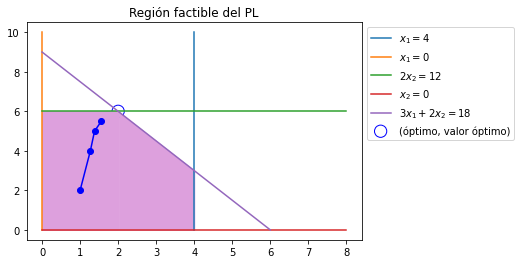

In [2]:
#x_1 ≤ 4

point1_x_1 = (4,0)

point2_x_1 = (4, 10)

point1_point2_x_1 = np.row_stack((point1_x_1, point2_x_1))

#x_1 ≥ 0
point3_x_1 = (0,0)

point4_x_1 = (0, 10)

point3_point4_x_1 = np.row_stack((point3_x_1, point4_x_1))

#2x_2 ≤ 12 or x_2 ≤ 6

point1_x_2 = (0, 6)

point2_x_2 = (8, 6)

point1_point2_x_2 = np.row_stack((point1_x_2, point2_x_2))

#x_2 ≥ 0

point3_x_2 = (0, 0)

point4_x_2 = (8, 0)

point3_point4_x_2 = np.row_stack((point3_x_2, point4_x_2))

#3x_1 + 2x_2 ≤ 18

x_1_region_1 = np.linspace(0,4, 100)

x_2_region_1 = 1/2*(18 - 3*x_1_region_1)


x_1 = np.linspace(0,6, 100)

x_2 = 1/2*(18 - 3*x_1)

plt.plot(point1_point2_x_1[:,0], point1_point2_x_1[:,1],
         point3_point4_x_1[:,0], point3_point4_x_1[:,1],
         point1_point2_x_2[:,0], point1_point2_x_2[:,1],
         point3_point4_x_2[:,0], point3_point4_x_2[:,1],
         x_1, x_2)

optimal_point = (2, 6)

plt.scatter(optimal_point[0], optimal_point[1], marker='o', s=150,
            facecolors="none", edgecolors='b')

plt.legend(["$x_1 = 4$", "$x_1 = 0$", 
            "$2x_2 = 12$", "$x_2 = 0$",
            "$3x_1+2x_2 = 18$", "(óptimo, valor óptimo)"], bbox_to_anchor=(1, 1))

point_1_interior_points = (1, 2)
point_2_interior_points = (1.27, 4)
point_3_interior_points = (1.38, 5)
point_4_interior_points = (1.56, 5.5)

points_interior_points = np.row_stack((point_1_interior_points,
                                       point_2_interior_points,
                                       point_3_interior_points,
                                       point_4_interior_points))

plt.plot(points_interior_points[:, 0], points_interior_points[:, 1], 
         marker='o', color="blue"
         )

plt.fill_between(x_1_region_1, 0, x_2_region_1, where=x_2_region_1<=6, color="plum")
x_1_region_2 = np.linspace(0,2, 100)
plt.fill_between(x_1_region_2, 0, 6, color="plum")
plt.title("Región factible del PL")
plt.show()


Aunque los métodos PI son una buena alternativa para resolver PL's perdemos ventajas que tiene el método símplex como es el análisis de sensibilidad y análisis posterior que se realiza al resolver el PL al modificar sus parámetros. Ver las referencias al final de la nota para tales análisis.

## Método primal-dual

Considérese la forma estándar de un PL:


$$
\displaystyle \min_{x \in \mathbb{R}^n} c^Tx\\
\text{sujeto a:} \\
Ax=b\\
x \geq 0
$$

donde: $A \in \mathbb{R}^{m \times n}, b \in \mathbb{R}^m$ con *rank* completo por renglones y las restricciones se interpretan de una forma *pointwise*.

La función Lagrangiana del problema anterior es:

$$\mathcal{L}(x, \lambda, \nu) = f_o(x) + \displaystyle \sum_{i=1}^n \lambda_i f_i(x) + \sum_{i=1}^m \nu_i h_i(x) = c^Tx + \lambda^T(-x)  + \nu^T(b-Ax)$$

El problema dual asociado es:

$$\displaystyle \max_{\nu \in \mathbb{R}^m, \lambda \in \mathbb{R}^n} b^T \nu \\
\text{sujeto a :} \\
c - A^T \nu - \lambda = 0 \\
\lambda \geq 0
$$

```{margin}

Compárense estas condiciones con las señaladas en el {ref}`comentario<PRIMERAFORMULACIONCONDKKT>` sobre las condiciones KKT en el contexto de problemas de optimización convexa.

```

Las condiciones KKT son:

$$
\begin{eqnarray}
\nabla_x \mathcal{L}(x, \lambda, \nu) &=& c - A^T\nu - \lambda = 0 \nonumber \\
\lambda^T(-x) &=& 0 \nonumber \\
Ax &=& b \nonumber \\
-x &\leq& 0 \nonumber \\
\lambda &\geq& 0
\end{eqnarray}
$$

```{margin}

El problema primal es: 

$\displaystyle \min_{x \in \mathbb{R}^n} c^Tx \\
\text{sujeto a:}\\
Ax = b \\
x \geq 0
$

```

Los métodos de la clase primal-dual encuentran soluciones $(x^*, \lambda^*, \nu^*)$ con variantes del método de Newton para las igualdades anteriores modificando las direcciones de búsqueda y tamaños de paso de modo que las desigualdades se satisfagan de forma **estricta** en cada iteración.

La idea de los métodos de la clase primal-dual es reescribir las condiciones KKT de optimalidad anteriores mediante una función $F: \mathbb{R}^{2n + m} \rightarrow \mathbb{R}^{2n+m}$ dada por:

$$F(x, \lambda, \nu ) = \left [ \begin{array}{c} A^T \nu + \lambda -c \\ X \Lambda e \\  Ax - b \end{array} \right ]$$


y resolver la ecuación **no lineal** $F(x, \lambda, \nu )=0$ para $(x, \lambda) \geq 0$, donde: $X = \text{diag}(x_1, \dots, x_n)$, $\Lambda = \text{diag}(\lambda_1, \dots, \lambda_n)$ y $e$ es un vector de $1$'s en $\mathbb{R}^n$.

Los métodos de la clase primal-dual producen iteraciones $(x^{(k)}, \lambda^{(k)}, \nu^{(k)})$ tales que $x^{(k)} > 0$ y $\lambda^{(k)} > 0$, por esto tales métodos son considerados como puntos interiores. 

Como la mayoría de los métodos iterativos en optimización, los métodos primal-dual tienen un procedimiento para determinar la dirección de búsqueda y una cantidad que debe ser monitoreada cuyo valor alcance un valor objetivo. En el caso de los PL's tal cantidad es la *duality gap* medida como: $\lambda^Tx$ 

A continuación se presentan tres ideas que se utilizan en los métodos primal-dual.

### Primera idea: determinar la dirección de búsqueda

```{margin}

Si bien podría elegirse otra dirección de búsqueda, la dirección de Newton se prefiere por sus propiedades de convergencia e invarianza ante transformaciones afín.

```

La dirección de búsqueda se determina aplicando el método de Newton al sistema de ecuaciones no lineales anterior. Por tanto, se resuelve el sistema de ecuaciones lineales:

$$J_F(x, \lambda, \nu) \left [ \begin{array}{c} \Delta x \\ \Delta \lambda \\ \Delta \nu \end{array} \right ] = - F(x, \lambda, \nu)$$

donde: $J_F$ es la Jacobiana de $F$ cuya expresión es:

$$J_F(x, \lambda, \nu) = \left [ \begin{array}{ccc} 0 & I & A^T \\ \Lambda & X & 0 \\ A & 0 & 0 \end{array} \right ].$$

para el vector de incógnitas $\left [ \begin{array}{c} \Delta x \\ \Delta \lambda \\ \Delta \nu \end{array} \right ]$. Una vez calculado tal vector de incógnitas se realiza la actualización:

$$\left [ \begin{array}{c} x \\ \lambda \\ \nu \end{array} \right ]^{(k+1)} = \left [ \begin{array}{c} x \\ \lambda \\ \nu \end{array} \right ]^{(k)} + \left [ \begin{array}{c} \Delta x \\ \Delta \lambda \\ \Delta \nu \end{array} \right ]$$

$k$ hace referencia a la $k$-ésima iteración.

Si denotamos $r_d = A^T \nu + \lambda -c, r_p = Ax - b$ como el residual para factibilidad dual y residual para factibilidad primal respectivamente entonces el sistema de ecuaciones lineales a resolver es:

$$\left [ \begin{array}{ccc} 0 & I & A^T \\ \Lambda & X & 0 \\ A & 0 & 0 \end{array} \right ]  \left [ \begin{array}{c} \Delta x \\ \Delta \lambda \\ \Delta \nu \end{array} \right ] =  - \left [ \begin{array}{c} r_d \\ X \Lambda e \\ r_p \end{array} \right ]$$

### Segunda idea: cortar el paso

Si se toma un paso completo es muy posible que en la siguiente iteración se encuentre muy cercano a alguna de las fronteras de restricción o bien se salga de la región factible. Por ello se define un parámetro $t^{(k)} \in (0, 1]$ de modo que la actualización es:

$$\left [ \begin{array}{c} x \\ \lambda \\ \nu \end{array} \right ]^{(k+1)} = \left [ \begin{array}{c} x \\ \lambda \\ \nu \end{array} \right ]^{(k)} + t^{(k)}  \left [ \begin{array}{c} \Delta x \\ \Delta \lambda \\ \Delta \nu \end{array} \right ]$$

$k$ hace referencia a la $k$-ésima iteración.

```{admonition} Comentario

El parámetro $t^{(k)}$ se calcula con metodologías como búsqueda de línea o regiones de confianza, ver [line search](https://en.wikipedia.org/wiki/Line_search), {ref}`método de búsqueda de línea por backtracking <MBUSLINBACK>`, [trust region](https://en.wikipedia.org/wiki/Trust_region).

```

### Tercera idea: reducir la *duality gap* y centrar

En cada iteración de los métodos primal-dual se busca reducir la *duality gap* o bien mantenerse "cerca" de la trayectoria nombrada trayectoria central.

Recuérdese que la *duality gap* en un PL para el par $(x, \nu)$ primal-dual factible está dada por la diferencia: $c^Tx - b^T \nu$. La *duality gap* en un PL es igual a $\lambda^Tx$. En el sistema de ecuaciones lineales anterior se le representa como $X \Lambda e$.


La trayectoria central se define a partir de la función de barrera logarítmica, ver [Barrier function](https://en.wikipedia.org/wiki/Barrier_function).

```{admonition} Definición

Considérese el problema de optimización convexa en la forma estándar:

$$\displaystyle \min_{x \in \mathbb{R}^n} f_o(x)$$

$$\text{sujeto a:}$$

$$f_i(x) \leq 0  \quad i=1,\dots,m$$

$$Ax = b$$

con $A \in \mathbb{R}^{p \times n}$ y *rank* de $A$ igual a $p < n$.

Se define la función de barrera logarítmica (BL) como:

$$\phi(x) =-\displaystyle \sum_{i=1}^m \log(-f_i(x))$$

```

```{sidebar} Un poco de historia ...

La metodología para resolver el problema de barrera logarítmica (PBL) está fundamentada en la *sequential unconstrained minimization technique (SUMT)*, [A. V. Fiacco, G. P. McCormick, 1965](https://www.jstor.org/stable/168637?seq=1). Es una técnica para resolver problemas no lineales sin restricciones generando una secuencia de puntos interiores factibles que convergen a la solución del problema. Se eligen funciones de barrera que cumplan con propiedades como la convexidad. Hay versiones de la SUMT para puntos exteriores que son no factibles y vía la penalización se busca la convergencia hacia la región factible. En cada paso de SUMT se define un valor del parámetro de barrera y se resuelve un problema de optimización más sencillo que el original. Al final de cada paso se obtiene una solución que ayuda a definir puntos iniciales del siguiente problema a resolver. A medida que se avanza en las iteraciones la función objetivo del PBL se aproxima cada vez más a $f_o$, al valor óptimo y al conjunto óptimo. 


```

Entonces el problema de optimización de la definición anterior que se debe resolver es:

$$
\displaystyle \min_{x \in \mathbb{R}^n} f_B(x|t_B) \\
\text{sujeto a:} \\
Ax = b
$$

donde: $f_B(x|t_B) = f_o(x) + \frac{1}{t_B} \phi(x) = f_o(x) -  \frac{1}{t_B} \displaystyle \sum_{i=1}^m \log(-f_i(x))$ con $t_B$ un parámetro positivo que nombramos **parámetro de barrera**. Denotamos a este problema como **problema de barrera logarítmica (PBL)**.

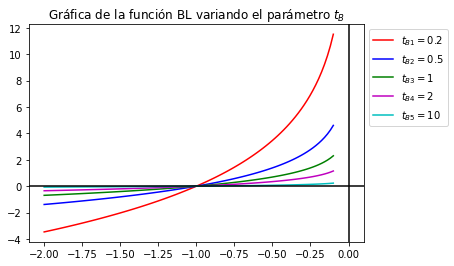

In [4]:
x = np.linspace(-2, -.1, 100)
log_barrier = -np.log(-x)
t_B1 = 0.2
t_B2 = 0.5
t_B3 = 1
t_B4 = 2
t_B5 = 10
plt.plot(x, 1/t_B1*log_barrier, "r",
         x, 1/t_B2*log_barrier, "b",
         x, 1/t_B3*log_barrier, "g",
         x, 1/t_B4*log_barrier, "m",
         x, 1/t_B5*log_barrier, "c")
plt.legend(["$t_{B1}=0.2$",
            "$t_{B2}=0.5$",
            "$t_{B3}=1$",
            "$t_{B4}=2$",
            "$t_{B5}=10$"], bbox_to_anchor=(1,1))
plt.axhline(color="black")
plt.axvline(color="black")
plt.title("Gráfica de la función BL variando el parámetro $t_B$")
plt.show()

Valores más grandes de $t_B$ hacen que $f_B(x|t_B)$ tienda a $f_o(x)$. Como se observa en la gráfica anterior al elegir un valor de $t_B$ cada vez más grande se tiene: $f_B(x|t_B) = f_o(x) + \frac{1}{t_B} \phi(x) \approx f_o(x)$. 

```{admonition} Comentarios


* La función $f(x) = -\frac{1}{t_B} \log(-x)$ para $x < 0$ es convexa, diferenciable y aproxima a la función indicadora:

$$I(x) = \begin{cases} \infty \text{ si } x > 0 \\ 0 \text{ si } x \leq 0 \end{cases}$$


la cual es una función discontinua:

<img src="https://dl.dropboxusercontent.com/s/i4t3j8c9amzue1n/indicator_func.png?dl=0" heigth="200" width="200">

En el dibujo anterior sólo se visualiza para el intervalo $(-\infty, 0)$.


* La función indicadora del punto anterior ayuda a reescribir el problema: 

$$
\begin{eqnarray}
\displaystyle \min_{x \in \mathbb{R}^n} &f_o(x)& \nonumber \\
&\text{sujeto a:}& \nonumber\\
f_i(x) &\leq& 0  \quad i=1,\dots,m \nonumber \\
Ax &=& b
\end{eqnarray}
$$ 

como:

$$\displaystyle \min_{x \in \mathbb{R}^n} f_o(x) + \displaystyle \sum_{i=1}^m I(f_i(x))$$

$$\text{sujeto a:}$$

$$Ax = b$$


de aquí que resolver el problema de BL sea equivalente a resolver el problema original.

* Si $x$ es facible del problema de BL y se incrementa $t_B$ se tienen mejores aproximaciones al problema de optimización. **Sin embargo** para valores "grandes" de $t_B$ la función objetivo del PBL tiene una Hessiana que varía rápidamente cerca de la frontera del conjunto factible.

* La función de barrera logarítmica es un caso particular de funciones de barrera que penalizan al no satisfacer las restricciones de desigualdad, ver [Penalty method](https://en.wikipedia.org/wiki/Penalty_method).

* En general las funciones de barrera deben tener las siguientes propiedades para $x$ primal factibles:

1. Tener valores "pequeños" si $x$ está "lejos" de la frontera de la región factible.

2. Tener valores "grandes" si $x$ está "cerca" de la frontera de la región factible.

3. Tener propiedades como convexidad o diferenciabilidad.

Por lo anterior las funciones de barrera evitan que se cruce o llegue a la frontera de la región factible del problema primal.


* Otra función de barrera para un PL es: $\phi(x) = -\displaystyle \sum_{i=1}^m \frac{1}{f_i(x)}$ para $x$ factibles.

* Los problemas de optimización convexos con únicamente restricciones de igualdad pueden resolverse con extensiones del método de Newton.


```

### Trayectoria central

```{admonition} Definición

Para cada valor del parámetro de barrera $t_B$, se definen los **puntos centrales** $x^*(t_B)$ como la solución del PBL y el conjunto de puntos centrales se le nombra trayectoria central, *central path*.

```

Tomando la forma estándar de un PL:


$$
\displaystyle \min_{x \in \mathbb{R}^n} c^Tx\\
\text{sujeto a:} \\
Ax=b\\
x \geq 0
$$

Se tiene 

$$
\begin{eqnarray}
\phi(x) &=& -\displaystyle \sum_{i=1}^m \log(-f_i(x)) \nonumber \\
&=& - \sum_{i=1}^n \log(x_i)
\end{eqnarray}
$$



y por tanto el PBL es:

$$
\displaystyle \min_{x \in \mathbb{R}^n} c^Tx - \frac{1}{t_B} \displaystyle \sum_{i=1}^n \log(x_i)\\
\text{sujeto a:} \\
Ax=b\\
$$

La función Lagrangiana del PBL es:

$$
\begin{eqnarray}
\mathcal{L}^{BL}(x, \nu) &=& f_{BL}(x|t_B) + \sum_{i=1}^m \nu_i h_i(x) \nonumber \\
&=& c^Tx - \frac{1}{t_B} \displaystyle \sum_{i=1}^n \log(x_i)  + \sum_{i=1}^m \nu_i(b_i-a_i ^Tx) \nonumber \\
&=& c^Tx - \frac{1}{t_B} \displaystyle \sum_{i=1}^n \log(x_i)  + \nu^T(b-Ax) \nonumber
\end{eqnarray}
$$

con $a_i$ $i$-ésimo renglón de $A$ y $b_i$ $i$-ésima entrada de $b$. Las condiciones necesarias y suficientes KKT de optimalidad son:

$$
\begin{eqnarray}
\nabla \mathcal{L}^{BL}_x(x, \nu) &=& c - \frac{1}{t_B} X^{-1}e + A^T\nu = 0 \nonumber \\
Ax &=& b \nonumber \\
\end{eqnarray}
$$

ver {ref}`condiciones KKT para un PL en su forma estándar <CONDKKTPLESTANDAR>`.

Los puntos centrales resuelven el PBL y por tanto satisfacen:

$$
\begin{eqnarray}
\nabla \mathcal{L}^{BL}_x(x^*(t), \nu) &=& c - \frac{1}{t_B} X(t)^{*-1}e + A^T\nu = 0 \nonumber \\
Ax^*(t)) &=& b \nonumber \\
\end{eqnarray}
$$

```{admonition} Comentario

Por la definición de la FBL se cumple: $f_i(x)  = -x_i < 0 \forall i=1, \dots, n$ que son las desigualdades de la factibilidad primal pues la función $\log$ está definida únicamente en $x_i >0$. Entonces $x_i^*(t) > 0$ debe cumplirse para $x_i^*(t)$ $i$-ésima componente de $x^*(t)$.


```

```{margin}

La forma estándar del problema de optimización convexa recuérdese es:

$$
\displaystyle \min_{x \in \mathbb{R}^n} f_o(x) \\
\text{sujeto a:} \\
f_i(x) \leq 0  \quad i=1,\dots,m \\
Ax = b
$$

```

Forma general de $\nabla_x \mathcal{L}^{BL}$ para el problema de optimización convexa en su forma estándar:

$$
\begin{eqnarray}
\nabla \mathcal{L}_x(x, \nu) &=& \nabla f_o(x^*(t)) + \frac{1}{t_B}\nabla \phi(x^*(t)) + A^T \nu = 0 \nonumber \\
&=& \nabla f_o(x^*(t)) + \frac{1}{t_B} \displaystyle \sum_{i=1}^m \frac{\nabla f_i(x^*(t))}{-f_i(x^*(t))} + A^T \nu \nonumber \\
\end{eqnarray}
$$

ver {ref}`la función Lagrangiana <FUNLAGRANGIANA>`.

```{admonition} Ejercicios
:class: tip

1.Resuelve los ejercicios y preguntas de la nota.
```


**Referencias:**

1. S. P. Boyd, L. Vandenberghe, Convex Optimization, Cambridge University Press, 2009.

2. J. Nocedal, S. J. Wright, Numerical Optimization, Springer, 2006.

3. F. Hillier, G. Lieberman, Introduction to Operations Research, Mc Graw Hill, 2014.
